In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78549738/least-square-inaccurate-in-chemical-speciation

In [2]:
K = np.array([2.81, 2.27, 1.77, 1.27, 0.81, 0.15])

In [21]:
def system(x, K, Ctx, CtL):
    return np.array([
        # Equilibrium constants:
        x[i + 1] - K[i] * x[i] * x[-1]
        for i in range(len(K))
    ] + [
        # Mass balance for Metal:
        np.sum(x[:-2]) - Ctx,
        # Mass balance for Ligand:
        np.sum(np.arange(len(K) + 1) * x[:-1]) - CtL
    ])

In [22]:
Ls = np.linspace(0, 12, 200)

In [23]:
sols = []
for L in Ls:
    sol = optimize.fsolve(system, x0=[1.] * (len(K) + 2), args=(K, 1., L))
    sols.append(sol)

In [24]:
C = np.array(sols)

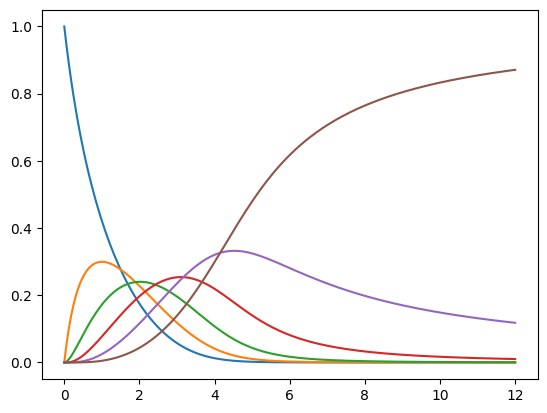

In [25]:
fig, axe = plt.subplots()
axe.plot(Ls, C[:,:-2])